# Phase 5 Project - 
## Natural Language Processing Model for Text Summarization of CNN Daily News articles

Name: Andrew Levinton
Student Pace: Self Pace
Instructor name: Ahbhineet Kukarni

## Understanding the Problem Statement

Customer reviews can often be long and descriptive. Analyzing these reviews manually, as you can imagine, is really time-consuming. This is where the brilliance of Natural Language Processing can be applied to generate a summary for long reviews.

We will be working on a really cool dataset. Our objective here is to generate a summary for the Amazon Fine Food reviews using the abstraction-based approach we learned about above. You can download the dataset from [here](https://www.kaggle.com/datasets/gowrishankarp/newspaper-text-summarization-cnn-dailymail)

It’s time to fire up our Jupyter notebooks! Let’s dive into the implementation details right away.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Attention
import warnings
pd.set_option("display.max_colwidth", 200)

warnings.filterwarnings("ignore")

In [2]:
from attention import AttentionLayer

# Business Problem

## Problem Statement:
The increasing volume of news articles and information available on the internet has made it challenging for individuals and businesses to efficiently consume and extract meaningful insights from this vast amount of text data. There is a growing need for an automated text summarization solution that can provide concise and informative summaries of news articles to aid decision-making and save time for readers.

## Description:

In today's information age, staying updated with news and information is crucial for both individuals and businesses. However, the sheer volume of news articles published daily can be overwhelming. Reading and processing these articles is time-consuming, especially when trying to gather insights from multiple sources.

To address this challenge, we propose the development of a text summarization model using natural language processing (NLP) techniques. This model will automatically generate concise and coherent summaries of news articles. Here's how it can benefit the public and support business decisions:

## Public Benefit:

1. `Time Efficiency`: People often struggle to find the time to read lengthy news articles. Automated summarization allows individuals to quickly grasp the key points of an article, saving them time while keeping them informed.

2. `Enhanced Understanding`: Summaries provide a condensed version of the article, making complex topics more accessible to a wider audience. This can help people better understand important news and events.

3. `Multi-source Insights`: Readers can efficiently scan summaries from multiple sources to get a well-rounded view of a topic, fostering critical thinking and a broader perspective.

## Business Benefit:

1. `Competitive Intelligence`: Businesses can use automated summarization to track news and developments in their industry, enabling them to stay ahead of competitors and adapt to market changes more effectively.

2. `Market Research`: Summarization can assist in analyzing customer sentiment, emerging trends, and competitor strategies by summarizing customer reviews, news, and social media posts.

3. `Content Curation`: Media companies and content aggregators can use summarization to curate content for their audience, improving user engagement and retention.

4. `Risk Assessment`: Summarizing financial news and reports can help financial institutions and investment firms quickly assess risks and opportunities in the market.

Project Goals:

To address this business problem and realize the benefits, the project should aim to accomplish the following goals:

1. `Data Collection`: Gather a diverse and comprehensive dataset of news articles across various domains and sources.

2. `Data Preprocessing`: Implement the preprocessing steps outlined, including lowercasing, HTML tag removal, contraction mapping, punctuation removal, stopword removal, and short word removal, to clean and prepare the text data.

3. `Model Development`: Build a text summarization model using LSTM (Long Short-Term Memory) networks with the specified parameters, including return sequences, return state, and stacked LSTM layers.

4. `Evaluation`: Assess the model's performance using appropriate evaluation metrics such as ROUGE (Recall-Oriented Understudy for Gisting Evaluation) scores or human evaluations to ensure the quality of the generated summaries.

5. `Deployment`: Develop a user-friendly interface or API to allow users to input news articles and receive automated summaries.

6. `Testing and Optimization`: Continuously test and optimize the model to improve the quality of the summaries and the user experience.

7. `Scalability`: Ensure that the solution can handle a large volume of articles and users, scaling infrastructure as needed.

8. `Monitoring and Maintenance`: Implement monitoring systems to track model performance over time and provide regular maintenance to keep the summarization service up-to-date and accurate.

# Dataset Dummary
The CNN / DailyMail Dataset is an English-language dataset containing just over 300k unique news articles as written by journalists at CNN and the Daily Mail. The current version supports both extractive and abstractive summarization, though the original version was created for machine reading and comprehension and abstractive question answering.

The columns of the dataframe are:
1. `ID`- Unique ID of the article
2. `article` - The raw content of the article
3. `Highlights` - A summary of the article

# Preview of dataframe

In [3]:
df = pd.read_csv('test.csv')

df.head()

,id,article,highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,"Ever noticed how plane seats appear to be getting smaller and smaller? With increasing numbers of people taking to the skies, some experts are questioning if having such packed out planes is putti...",Experts question if packed out planes are putting passengers at risk .\nU.S consumer advisory group says minimum space must be stipulated .\nSafety tests conducted on planes with more leg room th...
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,"A drunk teenage boy had to be rescued by security after jumping into a lions' enclosure at a zoo in western India. Rahul Kumar, 17, clambered over the enclosure fence at the Kamla Nehru Zoological...","Drunk teenage boy climbed into lion enclosure at zoo in west India .\nRahul Kumar, 17, ran towards animals shouting 'Today I kill a lion!'\nFortunately he fell into a moat before reaching lions an..."
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a new two-year deal to remain at Nottingham Forest. Freedman has stabilised Forest since he replaced cult hero Stuart Pearce and the club's owners are p...,Nottingham Forest are close to extending Dougie Freedman's contract .\nThe Forest boss took over from former manager Stuart Pearce in February .\nFreedman has since lead the club to ninth in the C...
3,caabf9cbdf96eb1410295a673e953d304391bfbb,"Liverpool target Neto is also wanted by PSG and clubs in Spain as Brendan Rodgers faces stiff competition to land the Fiorentina goalkeeper, according to the Brazilian's agent Stefano Castagna. Th...","Fiorentina goalkeeper Neto has been linked with Liverpool and Arsenal .\nNeto joined Firoentina from Brazilian outfit Atletico Paranaense in 2011 .\nHe is also wanted by PSG and Spanish clubs, acc..."
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,"Bruce Jenner will break his silence in a two-hour interview with Diane Sawyer later this month. The former Olympian and reality TV star, 65, will speak in a 'far-ranging' interview with Sawyer for...","Tell-all interview with the reality TV star, 69, will air on Friday April 24 .\nIt comes amid continuing speculation about his transition to a woman and following his involvement in a deadly car c..."


## Sample Article

In [4]:
df['article'][1000]

"Cristiano Ronaldo and Lionel Messi will go head-to-head once more in the race to be this season's top scorer in the Champions League – although Luiz Adriano threatens to spoil the party. Both Barcelona and Real Madrid booked their spots in the semi-finals this week with victories over Paris Saint-Germain and Atletico Madrid respectively. The planet's best footballers have scored eight times in Europe this season. But Shakhtar Donetsk’s Adriano, courted by Arsenal and Liverpool, has netted on nine occasions this term. Cristiano Ronaldo, in action against Atletico Madrid on Wednesday evening, has scored eight goals in Europe . Lionel Messi also has eight goals in the Champions League this term; one fewer than Luiz Adriano . Ronaldo and Messi will both play at least two more times after Real Madrid and Barcelona reached the last four . Adriano, who moved to Donetsk in 2007, scored five against BATE Borsiov in the group stages. His performance that night made history, with the 27-year-old

In [5]:
df['highlights'][1000]

"Luiz Adriano scored nine times for Shakhtar Donetsk in Europe this season .\nThe Brazilian is out of contract at the end of the year... both Arsenal and Liverpool are interested in signing the 27-year-old .\nCristiano Ronaldo and Lionel Messi have netted eight goals this season .\nReal Madrid and Barcelona both in the Champions League semi-finals .\nREAD: Our reporters have their say on who will win the Champions League .\nCLICK HERE for Sportsmail's guide to the Champions League final four ."

# Sample Highlight

## Checking for length and nulls

Checking the length of a DataFrame is a fundamental step in data analysis and manipulation. It provides valuable information about the data's size, which can be used for data validation, sampling, indexing, transformation, and various analytical tasks. Understanding the length of your data is a crucial aspect of effective data handling and analysis.

Checking for nulls in data is crucial for maintaining data quality, ensuring accurate analyses, supporting machine learning models, enabling data imputation, and making informed decisions.

In [6]:
len(df)

11490

In [7]:
df.isnull().sum()

id            0
article       0
highlights    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11490 entries, 0 to 11489
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11490 non-null  object
 1   article     11490 non-null  object
 2   highlights  11490 non-null  object
dtypes: object(3)
memory usage: 269.4+ KB


# Getting the word count
The purpose of the code below is to provide a quantitative measure of the word count for each article in the DataFrame. Knowing the word count of each article can be valuable for various natural language processing tasks, such as text summarization, where you might want to generate a concise summary of the content while preserving essential information or meeting a specific length requirement. By having the word count readily available in the 'WordCount' column, you can make informed decisions and apply algorithms or methods that take the length of the text into account during the summarization process, ensuring that the generated summaries are of an appropriate length.


After we generate the word count we will:

- Look at distribution
- Look at general statistics like the mean and median to analyze the general text length

In [9]:
# Function to count words in a text column
def count_words(text):
    words = text.split()
    return len(words)

# Apply the function to the DataFrame column
df['articleWordCount'] = df['article'].apply(count_words)
df['highlightsWordCount'] = df['highlights'].apply(count_words)
df.head()

,id,article,highlights,articleWordCount,highlightsWordCount
0,92c514c913c0bdfe25341af9fd72b29db544099b,"Ever noticed how plane seats appear to be getting smaller and smaller? With increasing numbers of people taking to the skies, some experts are questioning if having such packed out planes is putti...",Experts question if packed out planes are putting passengers at risk .\nU.S consumer advisory group says minimum space must be stipulated .\nSafety tests conducted on planes with more leg room th...,370,36
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,"A drunk teenage boy had to be rescued by security after jumping into a lions' enclosure at a zoo in western India. Rahul Kumar, 17, clambered over the enclosure fence at the Kamla Nehru Zoological...","Drunk teenage boy climbed into lion enclosure at zoo in west India .\nRahul Kumar, 17, ran towards animals shouting 'Today I kill a lion!'\nFortunately he fell into a moat before reaching lions an...",311,38
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a new two-year deal to remain at Nottingham Forest. Freedman has stabilised Forest since he replaced cult hero Stuart Pearce and the club's owners are p...,Nottingham Forest are close to extending Dougie Freedman's contract .\nThe Forest boss took over from former manager Stuart Pearce in February .\nFreedman has since lead the club to ninth in the C...,110,35
3,caabf9cbdf96eb1410295a673e953d304391bfbb,"Liverpool target Neto is also wanted by PSG and clubs in Spain as Brendan Rodgers faces stiff competition to land the Fiorentina goalkeeper, according to the Brazilian's agent Stefano Castagna. Th...","Fiorentina goalkeeper Neto has been linked with Liverpool and Arsenal .\nNeto joined Firoentina from Brazilian outfit Atletico Paranaense in 2011 .\nHe is also wanted by PSG and Spanish clubs, acc...",308,44
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,"Bruce Jenner will break his silence in a two-hour interview with Diane Sawyer later this month. The former Olympian and reality TV star, 65, will speak in a 'far-ranging' interview with Sawyer for...","Tell-all interview with the reality TV star, 69, will air on Friday April 24 .\nIt comes amid continuing speculation about his transition to a woman and following his involvement in a deadly car c...",749,61


In [10]:
df['articleWordCount'].describe()

count    11490.000000
mean       683.511575
std        348.402755
min         55.000000
25%        419.000000
50%        613.000000
75%        876.000000
max       1954.000000
Name: articleWordCount, dtype: float64

In [11]:
df['highlightsWordCount'].describe()

count    11490.000000
mean        55.009312
std         22.517857
min          9.000000
25%         40.000000
50%         51.000000
75%         64.000000
max        564.000000
Name: highlightsWordCount, dtype: float64

The average token count for the articles and the highlights are provided below:



| Feature      | Mean Token Count |
|--------------|------------------|
| Article      | 683              |
| Highlights   | 56               |


# Data Preparation

Performing basic preprocessing steps is very important before we get to the model building part. Using messy and uncleaned text data is a potentially disastrous move. So in this step, we will drop all the unwanted symbols, characters, etc. from the text that do not affect the objective of our problem.

Here is the dictionary that we will use for expanding the contractions:

### Contraction Mapping
A contraction mapping, also known as a "contraction operator" or "contraction function," is a concept from mathematics, specifically in the field of functional analysis. In the context of text summarization, it's not directly used, but related concepts and techniques from mathematics and natural language processing can be applied to improve the quality of text summarization models.

In [12]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

We will perform the below preprocessing tasks for our data:

1.Convert everything to lowercase

2.Remove HTML tags

3.Contraction mapping

4.Remove (‘s)

5.Remove any text inside the parenthesis ( )

6.Eliminate punctuations and special characters

7.Remove stopwords

8.Remove short words

Let’s define the function:

In [13]:
stop_words = set(stopwords.words('english')) 

def text_cleaner(text,num):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    if(num==0):
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens=newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                                                 #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [14]:
#call the function
cleaned_text = []
for t in df['article']:
    cleaned_text.append(text_cleaner(t,0)) 

In [15]:
cleaned_text[:5]  

['ever noticed plane seats appear getting smaller smaller increasing numbers people taking skies experts questioning packed planes putting passengers risk say shrinking space aeroplanes uncomfortable putting health safety danger squabbling arm rest shrinking space planes putting health safety danger week consumer advisory group set department transportation said public hearing government happy set standards animals flying planes stipulate minimum amount space humans world animals rights space food humans said charlie leocha consumer representative committee time dot faa take stand humane treatment passengers could crowding planes lead serious issues fighting space overhead lockers crashing elbows seat back kicking tests conducted faa use planes inch pitch standard airlines decreased many economy seats united airlines inches room airlines offer little inches cynthia corbertt human factors researcher federal aviation administration conducts tests quickly passengers leave plane tests cond

In [16]:
#call the function
cleaned_summary = []
for t in df['highlights']:
    cleaned_summary.append(text_cleaner(t,1))

In [17]:
cleaned_summary[:10]

['experts question if packed out planes are putting passengers at risk consumer advisory group says minimum space must be stipulated safety tests conducted on planes with more leg room than airlines offer',
 'drunk teenage boy climbed into lion enclosure at zoo in west india rahul kumar ran towards animals shouting today kill lion fortunately he fell into moat before reaching lions and was rescued',
 'nottingham forest are close to extending dougie freedman contract the forest boss took over from former manager stuart pearce in february freedman has since lead the club to ninth in the championship',
 'fiorentina goalkeeper neto has been linked with liverpool and arsenal neto joined firoentina from brazilian outfit atletico paranaense in he is also wanted by psg and spanish clubs according to his agent click here for the latest liverpool news',
 'tell all interview with the reality tv star will air on friday april it comes amid continuing speculation about his transition to woman and fo

In [18]:
df['cleaned_text']=cleaned_text
df['cleaned_summary']=cleaned_summary

# Drop empty rows

In [19]:
df.replace('', np.nan, inplace=True)
df.dropna(axis=0,inplace=True)

# Understanding the distribution of the sequences
Here, we will analyze the length of the reviews and the summary to get an overall idea about the distribution of length of the text. This will help us fix the maximum length of the sequence:

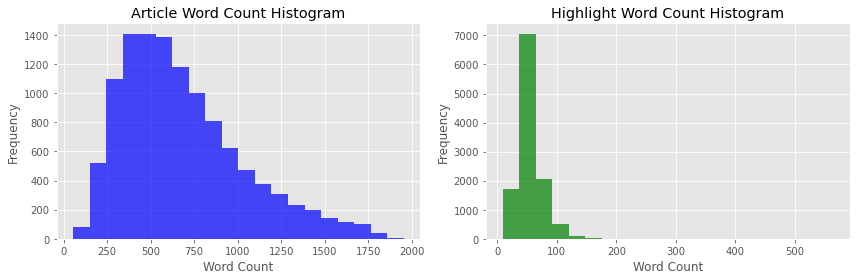

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


ax1.hist(df['articleWordCount'], bins=20, color='blue', alpha=0.7)
ax1.set_title('Article Word Count Histogram')
ax1.set_xlabel('Word Count')
ax1.set_ylabel('Frequency')


ax2.hist(df['highlightsWordCount'], bins=20, color='green', alpha=0.7)
ax2.set_title('Highlight Word Count Histogram')
ax2.set_xlabel('Word Count')
ax2.set_ylabel('Frequency')


plt.tight_layout()


plt.show()

## Analyzing the length of the highlights
The purpose the code below is to analyze and gain insights into the distribution of summary lengths within a dataset. By iterating through the 'cleaned_summary' column of the DataFrame and checking the number of words in each cleaned summary, the code helps identify how many of these summaries are concise, containing 75 words or less. This analysis is valuable in various natural language processing and text analysis tasks, such as text summarization or information retrieval, as it provides an understanding of the dataset's summarization patterns. Furthermore, it allows data practitioners to assess the suitability of the dataset for specific applications that may have constraints on summary length.

In [21]:
cnt=0
for i in df['cleaned_summary']:
    if(len(i.split())<=75):
        cnt=cnt+1
print(cnt/len(df['cleaned_summary']))

0.9079199303742385


We observe that 91% of the highlights have length below 75. So, we can fix maximum length of summary to 75.

Let us fix the maximum length of an article to 750

In [22]:
cnt=0
for i in df['cleaned_text']:
    if(len(i.split())<=300):
        cnt=cnt+1
print(cnt/len(df['cleaned_text']))

0.4194952132288947


We observe that 95% of the articles have length below 750. So, we can fix maximum length of summary to 750.

In [23]:
max_text_len=300
max_summary_len=75

The purpose of the code below is to filter and create a new dataset (data) that contains text and summary pairs where both the text and summary have lengths within certain limits (max_summary_len and max_text_len). This can be useful when working with text summarization tasks or other natural language processing applications where controlling the length of input and output sequences is important. The resulting data DataFrame can be used for training, validation, or testing in machine learning models or other text analysis tasks.

In [24]:
cleaned_text =np.array(df['cleaned_text'])
cleaned_summary=np.array(df['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
data=pd.DataFrame({'article':short_text,'highlights':short_summary})

In [25]:
data.head()

,article,highlights
0,ever noticed plane seats appear getting smaller smaller increasing numbers people taking skies experts questioning packed planes putting passengers risk say shrinking space aeroplanes uncomfortabl...,experts question if packed out planes are putting passengers at risk consumer advisory group says minimum space must be stipulated safety tests conducted on planes with more leg room than airlines...
1,drunk teenage boy rescued security jumping lions enclosure zoo western india rahul kumar clambered enclosure fence kamla nehru zoological park ahmedabad began running towards animals shouting woul...,drunk teenage boy climbed into lion enclosure at zoo in west india rahul kumar ran towards animals shouting today kill lion fortunately he fell into moat before reaching lions and was rescued
2,dougie freedman verge agreeing new two year deal remain nottingham forest freedman stabilised forest since replaced cult hero stuart pearce club owners pleased job done city ground dougie freedman...,nottingham forest are close to extending dougie freedman contract the forest boss took over from former manager stuart pearce in february freedman has since lead the club to ninth in the championship
3,liverpool target neto also wanted psg clubs spain brendan rodgers faces stiff competition land fiorentina goalkeeper according brazilian agent stefano castagna reds linked move year old whose cont...,fiorentina goalkeeper neto has been linked with liverpool and arsenal neto joined firoentina from brazilian outfit atletico paranaense in he is also wanted by psg and spanish clubs according to hi...
4,moment crew firefighters struggled haul giant pig garden swimming pool prize porker known pigwig fallen pool upmarket neighbourhood ringwood hampshire owners taking walk around garden animal plung...,giant pig fell into the swimming pool at his home in ringwood hampshire it took the efforts of team of firefighters to winch him out of the water wayward horse also had to be rescued from swimming...


In [26]:
data['article'][1000]

'may best photo bomb ever adorable green sea turtle made quite unexpected appearance tourist diovani de jesus group photo posing apo island sea turtle surfaced breathe photo bombed de jesus wrote blog adorable green sea turtle pulled ultimate photo bomb crashing group photo philippines shallow water apo island negros oriental philippines feeding ground sea turtles spottings uncommon however rare one endangered animals would come close look intently camera posting photo earth day de jesus adds like friend genesis said reminder humans creatures like gentle pawikan co exist particular island one world best known community managed marine protected areas turtles traditionally found tropical subtropical waters travelling long distances feeding areas beaches hatched traveller diovani de jesus posted hilarious photo earth day reminder co exist'

In [27]:
data['highlights'][1000]

'at apo island this green sea turtle unexpected appeared in group photo as the snorkellers posed the turtle surfaced to breathe and photo bombed the area is feeding ground and well known marine protection site'

## Seq2Seq Prep
Now we want to prepare the 'highlights' column of the DataFrame data for sequence-to-sequence (seq2seq) model training, specifically for text summarization tasks. This code applies a lambda function to each element in the 'highlights' column, which typically contains the summary or the target sequence.

'sostok ' is added to the beginning of each summary. 'sostok' is a special token that represents the start of a sequence in the context of sequence-to-sequence models.
'eostok' is added to the end of each summary. 'eostok' is a special token that represents the end of a sequence in the context of sequence-to-sequence models.

The result of this operation is that each summary in the 'highlights' column is enclosed with 'sostok' at the beginning and 'eostok' at the end. This formatting is commonly used in seq2seq models for tasks like text summarization to indicate the start and end points of the target sequence.

By adding these special tokens, the code prepares the 'highlights' column for training a seq2seq model to generate summaries from the input text data. These tokens help the model learn where the summary should start and end when generating output sequences during training and inference.

In [28]:
data['highlights'] = data['highlights'].apply(lambda x : 'sostok '+ x + ' eostok')

In [29]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(data['article']),np.array(data['highlights']),test_size=0.1,random_state=0,shuffle=True) 

In [30]:
from keras.preprocessing.text import Tokenizer 

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [31]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 55.22254212488791
Total Coverage of rare words: 4.228957866412188


Remember:

- **tot_cnt** gives the size of vocabulary (which means every unique words in the text)

- **cnt** gives me the no. of rare words whose count falls below threshold

- **tot_cnt** - cnt gives me the top most common words

Let us define the tokenizer with top most common words for reviews.

This code prepares text data for NLP tasks by tokenizing the text, converting it into integer sequences, and ensuring that the sequences have the same length through padding. It also calculates the size of the vocabulary that will be used in subsequent NLP model training.

In [32]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

In [33]:
x_voc

18975

# Summary Tokenizer

In [34]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

# Rarewords and its Coverage
Let us look at the proportion rare words and its total coverage in the entire summary

Here, I am defining the threshold to be 6 which means word whose count is below 6 is considered as a rare word

In [35]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
        
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 79.2510775862069
Total Coverage of rare words: 13.976228520466934


In [36]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

In [37]:
y_voc

3852

Let us check whether word count of start token is equal to length of the training data

In [38]:
y_tokenizer.word_counts['sostok'],len(y_tr)   

(4180, 4180)

Here, I am deleting the rows that contain only START and END tokens

In [39]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [40]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

# Model building

# Baseline - TFIDF Vectorizer 

[TFIDF](https://medium.com/@ashins1997/text-summarization-f2542bc6a167#:~:text=Sentence%20scoring%20using%20tf%2Didf,word%20occurs%20in%20the%20document.)

- **Sentence scoring using tf-idf is one of the extractive approaches for text summarization.** 
- **TF-IDF stands for Term Frequency** — Inverse Document Frequency. It is the product of two statistics.

- **Term Frequency (TF)** : It is the number of times the word occurs in the document.
Inverse Document Frequency (IDF) : It is the measure of how much information the word provides, i.e., if it’s common or rare across all documents.

Steps

1. Covert text to sentences : Converting a single text to list of sentences.
2. Pre-process text : Clean the sentences by removing unnecessary words, stopwords, punctuations, etc.
3. Create term frequency (tf) matrix : It shows the frequency of words in each sentence. We will calculate relative frequency to represent the tf instead of using actual frequency. 
>It is calculated as t / T where,
> - t = Number of times the term appears in the document,
> - T = Total number of terms in the document
4. Create idf matrix : It shows the importance of words in each sentence with respect to the whole document. 
> It is calculated as log_e(D/d) where,
> - D = Total number of documents,
> - d = Number of documents with term t in it
5. Calculate sentence tf-idf : It is the product of tf and idf for each word in the sentence and shows the importance of each word in the sentence.
6. Calculate sentence scores : Here score of the sentences are calculated as the average of the tf-idf value of words in the sentence. It is calculated as
> T / n where,
> - T = Total tf-idf of words in the sentence,
> - n = Number of distinct words in the sentence
7. Determine threshold : Threshold is the average value of the scores of the sentences. 
> It is calculated as S / s where,
> - S = Total sum of scores of sentences,
> - s = Number of sentences
8. Generate summary : Generate a summary by extracting the sentences having scores greater than the threshold value.

# Sample Article

In [41]:
df['article'][1000]

"Cristiano Ronaldo and Lionel Messi will go head-to-head once more in the race to be this season's top scorer in the Champions League – although Luiz Adriano threatens to spoil the party. Both Barcelona and Real Madrid booked their spots in the semi-finals this week with victories over Paris Saint-Germain and Atletico Madrid respectively. The planet's best footballers have scored eight times in Europe this season. But Shakhtar Donetsk’s Adriano, courted by Arsenal and Liverpool, has netted on nine occasions this term. Cristiano Ronaldo, in action against Atletico Madrid on Wednesday evening, has scored eight goals in Europe . Lionel Messi also has eight goals in the Champions League this term; one fewer than Luiz Adriano . Ronaldo and Messi will both play at least two more times after Real Madrid and Barcelona reached the last four . Adriano, who moved to Donetsk in 2007, scored five against BATE Borsiov in the group stages. His performance that night made history, with the 27-year-old

## 1.Convert text to sentences

In [42]:
from nltk.tokenize import sent_tokenize
text = df['article'][1000]
sentences = sent_tokenize(text)

## Preprocess Text

In [43]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def text_preprocessing(sentences):
    """
    Pre processing text to removeunnecessary words.
    """    
    print('Preprocessing text')    
    stop_words = set(stopwords.words('english'))
    clean_words = []
    for sent in sentences:
        words = word_tokenize(sent)
        words = [ps.stem(word.lower()) for word in words if word.isalnum()]
        clean_words += [word for word in words if word not in stop_words]
    return clean_words

# 3.Create term frequency (tf) matrix

In [44]:
def create_tf_matrix(sentences: list) -> dict:
    """
    Here document refers to a sentence.
    TF(t) = (Number of times the term t appears in a document) /         (Total number of terms in the document)
    """
    print('Creating tf matrix.')
    tf_matrix = {}
    for sentence in sentences:
        tf_table = {}
        words_count = len(word_tokenize(sentence))
        clean_words = text_preprocessing([sentence])
        # Determining frequency of words in the sentence
        word_freq = {}
        for word in clean_words:
            word_freq[word] = (word_freq[word] + 1) if word in  word_freq else 1
        # Calculating tf of the words in the sentence
        for word, count in word_freq.items():
            tf_table[word] = count / words_count
        tf_matrix[sentence[:15]] = tf_table
    return tf_matrix

# 4.Create idf matrix

In [45]:
import math
def create_idf_matrix(sentences: list) -> dict:
    """
    IDF(t) = log_e(Total number of documents / Number of documents     with term t in it)
    """
    print('Creating idf matrix.')

    idf_matrix = {}

    documents_count = len(sentences)
    sentence_word_table = {}

    # Getting words in the sentence
    for sentence in sentences:
        clean_words = text_preprocessing([sentence])
        sentence_word_table[sentence[:15]] = clean_words

    # Determining word count table with the count of sentences which contains the word.
    word_in_docs = {}
    for sent, words in sentence_word_table.items():
        for word in words:
            word_in_docs[word] = (word_in_docs[word] + 1) if word in word_in_docs else 1

    # Determining idf of the words in the sentence.
    for sent, words in sentence_word_table.items():
        idf_table = {}
        for word in words:
            idf_table[word] = math.log10(documents_count / float(word_in_docs[word]))

        idf_matrix[sent] = idf_table

    return idf_matrix

## 5.Calculate sentence tf-idf

In [46]:
def create_tf_idf_matrix(tf_matrix, idf_matrix) -> dict:
    """
    Create a tf-idf matrix which is multiplication of tf * idf individual words
    """
    print('Calculating tf-idf of sentences.')

    tf_idf_matrix = {}

    for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):
        tf_idf_table = {}

        for (word1, value1), (word2, value2) in zip(f_table1.items(), f_table2.items()):
            tf_idf_table[word1] = float(value1 * value2)

        tf_idf_matrix[sent1] = tf_idf_table

    return tf_idf_matrix

## 6.Calculate sentence scores

In [47]:
def create_sentence_score_table(tf_idf_matrix) -> dict:
    """
    Determining average score of words of the sentence with its words tf-idf value.
    """
    print('Creating sentence score table.')

    sentence_value = {}

    for sent, f_table in tf_idf_matrix.items():
        total_score_per_sentence = 0

        count_words_in_sentence = len(f_table)
        for word, score in f_table.items():
            total_score_per_sentence += score

        sentence_value[sent] = total_score_per_sentence / count_words_in_sentence

    return sentence_value

## 7.Determine threshold

In [48]:
def find_average_score(sentence_value):
    """
    Calculate average value of a sentence form the sentence score table.
    """
    print('Finding average score')

    sum = 0
    for val in sentence_value:
        sum += sentence_value[val]

    average = sum / len(sentence_value)

    return average

## 8.Generate summary

In [49]:
def generate_summary(sentences, sentence_value, threshold):
    """
    Generate a sentence for sentence score greater than average.
    """
    print('Generating summary')

    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:15] in sentence_value and sentence_value[sentence[:15]] >= threshold:
            summary += sentence + " "
            sentence_count += 1

    return summary

In [50]:
tf_matrix = create_tf_matrix(sentences)
# print('TF matrix', tf_matrix)

idf_matrix = create_idf_matrix(sentences)
# print('IDF matrix',idf_matrix)

tf_idf_matrix = create_tf_idf_matrix(tf_matrix, idf_matrix)
# print('TF-IDF matrix', tf_idf_matrix)
# print('First document tfidf',tf_idf_matrix[list(tf_idf_matrix.keys())[0]])

sentence_value = create_sentence_score_table(tf_idf_matrix)
print('Sentence Scores', sentence_value)

threshold = find_average_score(sentence_value)
# print('Threshold', threshold)

summary = generate_summary(sentences, sentence_value, threshold)

Creating tf matrix.
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Creating idf matrix.
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Preprocessing text
Calculating tf-idf of sentences.
Creating sentence score table.
Sentence Scores {'Cristiano Ronal': 0.04718762953274642, 'Both Barcelona ': 0.04617809810090145, "The planet's be": 0.06442778376797274, 'But Shakhtar Do': 0.04404256982206562, 'Lionel Messi al': 0.0457816121849

In [51]:
df['article'][1000]

"Cristiano Ronaldo and Lionel Messi will go head-to-head once more in the race to be this season's top scorer in the Champions League – although Luiz Adriano threatens to spoil the party. Both Barcelona and Real Madrid booked their spots in the semi-finals this week with victories over Paris Saint-Germain and Atletico Madrid respectively. The planet's best footballers have scored eight times in Europe this season. But Shakhtar Donetsk’s Adriano, courted by Arsenal and Liverpool, has netted on nine occasions this term. Cristiano Ronaldo, in action against Atletico Madrid on Wednesday evening, has scored eight goals in Europe . Lionel Messi also has eight goals in the Champions League this term; one fewer than Luiz Adriano . Ronaldo and Messi will both play at least two more times after Real Madrid and Barcelona reached the last four . Adriano, who moved to Donetsk in 2007, scored five against BATE Borsiov in the group stages. His performance that night made history, with the 27-year-old

In [97]:
df = pd.read_csv('test.csv')

In [98]:
df['highlights'][1000]

"Luiz Adriano scored nine times for Shakhtar Donetsk in Europe this season .\nThe Brazilian is out of contract at the end of the year... both Arsenal and Liverpool are interested in signing the 27-year-old .\nCristiano Ronaldo and Lionel Messi have netted eight goals this season .\nReal Madrid and Barcelona both in the Champions League semi-finals .\nREAD: Our reporters have their say on who will win the Champions League .\nCLICK HERE for Sportsmail's guide to the Champions League final four ."

In [52]:
print('Summary\n', summary)

Summary
 Cristiano Ronaldo and Lionel Messi will go head-to-head once more in the race to be this season's top scorer in the Champions League – although Luiz Adriano threatens to spoil the party. The planet's best footballers have scored eight times in Europe this season. Cristiano Ronaldo, in action against Atletico Madrid on Wednesday evening, has scored eight goals in Europe . Adriano, who moved to Donetsk in 2007, scored five against BATE Borsiov in the group stages. The other was Messi for Barcelona against Bayer Leverkusen in 2012. His contract with Shakhtar Donetsk runs out at the end of the year. The draw for the last four will take place on Friday. 


In [53]:
print(f'Original {len(sent_tokenize(text))} sentences, Summarized {len(sent_tokenize(summary))} sentences')

Original 18 sentences, Summarized 7 sentences


# Iteration 2 - KL Model

`KL (Kullback-Leibler)` divergence is a measure of how one probability distribution differs from a second, reference probability distribution. In the context of text summarization and natural language processing, KL divergence can be used to measure the difference between two probability distributions of words or terms, typically with the goal of assessing the relevance of a sentence or document to a particular topic or reference distribution.



**Mathematical Definition:
KL divergence between two probability distributions P and Q is defined as:

**KL(P || Q) = Σ (P(x) * log(P(x) / Q(x)))**

Where:

- P(x) is the probability of an event x occurring according to distribution P.
- Q(x) is the probability of the same event x occurring according to distribution Q.
- The sum is taken over all possible events x.

### Interpretation:

- KL divergence measures the "divergence" or "difference" between two distributions. It quantifies how much one distribution (P) differs from the other (Q).
- KL divergence is not symmetric, meaning KL(P || Q) is not the same as KL(Q || P). The order of the distributions matters.
- When KL divergence is zero, it indicates that the two distributions are identical.



### KL Divergence in Text Summarization:

In the context of text summarization, you often have two distributions:
- P represents the probability distribution of words in a sentence or document you want to evaluate (e.g., a sentence in the source text).
- Q represents the reference distribution, which is typically derived from the entire source document or corpus.


The goal is to measure how well the words in the sentence (P) align with the overall word distribution in the document (Q).

### KL Divergence as a Score:

You can use KL divergence as a scoring mechanism to assess the informativeness or relevance of a sentence to the main topics or themes in the document.
- A higher KL divergence score implies that the sentence's word distribution significantly differs from the reference distribution, suggesting potential importance or uniqueness.

### Practical Use Cases:

KL divergence is often used in information retrieval, document summarization, and topic modeling to identify relevant documents or sentences.
In text summarization, you might calculate KL divergence for each sentence in the document compared to the document's word distribution. Sentences with higher KL divergence scores are considered more relevant for summarization.

### Limitations:

KL divergence can be sensitive to the size of the text data and can produce noisy results with small amounts of data.
It assumes that the two distributions have the same support (i.e., the same set of possible events).

In [54]:
import pandas as pd
import numpy as np
from gensim.parsing import strip_tags, strip_numeric, strip_multiple_whitespaces, stem_text, strip_punctuation, remove_stopwords
from gensim.parsing import preprocess_string
from gensim import parsing
import re

In [55]:
!pip install rouge
from rouge import Rouge
rouge = Rouge()

from collections import Counter

In [56]:
df_train = pd.read_csv("train.csv")

df_train

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,"By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundr...","Bishop John Folda, of North Dakota, is taking time off after being diagnosed .\nHe contracted the infection through contaminated food in Italy .\nChurch members in Fargo, Grand Forks and Jamestown..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,"(CNN) -- Ralph Mata was an internal affairs lieutenant for the Miami-Dade Police Department, working in the division that investigates allegations of wrongdoing by cops. Outside the office, author...","Criminal complaint: Cop used his role to help cocaine traffickers .\nRalph Mata, an internal affairs lieutenant, allegedly helped group get guns .\nHe also arranged to pay two assassins in a murde..."
2,00027e965c8264c35cc1bc55556db388da82b07f,"A drunk driver who killed a young woman in a head-on crash while checking his mobile phone has been jailed for six years. Craig Eccleston-Todd, 27, was driving home from a night at a pub when he r...","Craig Eccleston-Todd, 27, had drunk at least three pints before driving car .\nWas using phone when he veered across road in Yarmouth, Isle of Wight .\nCrashed head-on into 28-year-old Rachel Titl..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,"(CNN) -- With a breezy sweep of his pen President Vladimir Putin wrote a new chapter into Crimea's turbulent history, committing the region to a future returned to Russian domain. Sixty years prio...","Nina dos Santos says Europe must be ready to accept sanctions will hurt both sides .\nTargeting Russia's business community would be one way of sapping their support for President Putin, she says ..."
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 100% record in Sky Bet League One as a 2-0 win over Scunthorpe sent Graham Alexander’s men top of the table. The Cod Army are playing in the third tier ...,"Fleetwood top of League One after 2-0 win at Scunthorpe .\nPeterborough, Bristol City, Chesterfield and Crawley all drop first points of the season .\nStand-in striker Matt Done scores a hat-trick..."
...,...,...,...
287108,fffdfb56fdf1a12d364562cc2b9b1d4de7481dee,By . James Rush . Former first daughter Chelsea Clinton has indicated she could one day be open to running for office. The only child of former U.S. President Bill Clinton has said she is no longe...,Chelsea Clinton said question of running for office is no longer 'visceral no'\nSays she has been asked about running for office ever since being a child .\nBut she no longer completely rules out ...
287109,fffeecb8690b85de8c3faed80adbc7a978f9ae2a,"An apologetic Vanilla Ice has given his first proper interview following his arrest this week, saying he is struggling to eat and sleep and that he has never felt worse. The rapper turned renovati...","Vanilla Ice, 47 - real name Robert Van Winkle - was arrested in Lantana, Florida, on Wednesday and charged with burglary and grand theft .\nCops say he took furniture, a pool heater and bicycles f..."
287110,ffff5231e4c71544bc6c97015cdb16c60e42b3f4,America's most lethal sniper claimed he wished he'd 'killed more' Iraqis despite accumulating 160 confirmed kills - with the true number estimated to be as high as 255. Speaking just months before...,America's most lethal sniper made comment in interview three years ago .\nSaid only regret was that US lives were lost because he killed too few .\nFilm based on his book has been a box office hit...
287111,ffff924b14a8d82058b6c1c5368ff1113c1632af,"By . Sara Malm . PUBLISHED: . 12:19 EST, 8 March 2013 . | . UPDATED: . 13:05 EST, 8 March 2013 . Israel has been invaded by a swarm of more than one million locusts, sending the nation into panic ...",A swarm of more than one million has crossed border from Egypt to Israel .\nLocal chefs are cheering at the prospect of 'wild' loc

In [57]:
number_doc = 30000
abstract = []
introduction = []
cnt = 0

for index, row in df_train.iterrows():
    cnt += 1
    abstract.append(row['highlights'])
    introduction.append(row['article'])
    if cnt == number_doc:
        break

abstract = np.array(abstract)
introduction = np.array(introduction)

In [58]:
abstract[43]

'Heidi and Maryellen Olson conceived first daughter using donor sperm .\nHeidi gave birth to Sequoia on Nov 7, Maryellen wanted to breastfeed too .\nMaryellen followed a program of birth control pills and a milk-enhancing drug for three months before the birth at home in Santa Cruz, California .\nNow, both mothers nurse their daughter, claim it enhances their closeness .'

In [59]:
introduction[43]

'It is one of the key bonding experiences for a mother and child: breastfeeding. So lesbian partners Heidi and Maryellen Olson wanted to share that with their first-born Sequoia. They both nurse their one-month-old daughter. Phenomenon: Maryellen Olson, 25, nurses her daughter Sequoia despite not giving birth . Both breastfeeding: Her wife Heidi, 26, naturally lactates meaning they can both nurse their first-born . Dubbed \'co-nursing\', the little-known practice requires Maryellen, who didn\'t give birth, to induce lactation and take a natural drug to boost breastmilk. According to the new parents, it has changed everything. \'It is so worth it for the closeness I feel with Sequoia, and also for the sanity-saving it provides both of us,\' graduate student Maryellen, 25, told MailOnline from the family\'s home in Santa Cruz, California. \'We both feel pretty amazed. \'It\'s amazing to see what our bodies can do, and we felt lucky to have this additional bonding experience available for

In [60]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alevi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alevi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alevi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [61]:
def get_Sentences(introduction):
    sentences = sent_tokenize(introduction.lower())
    sentences = [s for s in sentences if len(s.strip()) > 1]
    return sentences

In [62]:
def preprocessing(sentences):

    # remove_emails = lambda s: re.sub(r'^[a-zA-Z0-9+_.-]+@[a-zA-Z0-9.-]+$', '', s)
    # remove_single_char = lambda s: re.sub(r'\s+\w{1}\s+', '', s)

    CLEAN_FILTERS = [
                    #remove_emails,
                    strip_tags,
                    strip_numeric, 
                    strip_multiple_whitespaces]

    processed_words = preprocess_string(sentences, CLEAN_FILTERS)
    text = ' '.join(processed_words)
    tokens = word_tokenize(text.lower())
    
    stop_words = set(stopwords.words('english'))
    stop_words.add('\x1a')
    punctuations = set(string.punctuation)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    
    return filtered_tokens

In [63]:
def get_word_freq(tokens):
    word_freq = Counter(tokens)
    #print(word_freq)
    total_words = sum(word_freq.values())
    #print(total_words)
    return word_freq, total_words

In [64]:
def get_word_pd(word_freq,total_words):
    word_pd = {word: count / total_words for word, count in word_freq.items()}
    #print(word_pd)
    return word_pd

### Using Kullback-Leibler to generate summaries
The two functions, KL and get_Summary, work together to generate a summary from given text using a KL (Kullback-Leibler) divergence-based approach. Here's an explanation of what each function does:

- KL(sentences, word_pd): This function calculates the sentence scores based on KL divergence. It takes two arguments:

> - sentences: a list of sentences from the input text.
> - word_pd: a probability distribution of words in the entire document.

For each sentence in the sentences list, it first preprocesses the sentence by converting it to lowercase and tokenizing it into words (using preprocessing(sentence.lower())).
It then calculates the word frequency of each word in the sentence using a Counter.
Next, it computes the probability distribution of words (sent_ps) within the sentence by dividing the word frequency by the total number of words in the sentence.
It iterates over each word in the sentence and calculates the KL divergence score for that word with respect to the document-level word probability distribution (word_pd).
The KL divergence score for the sentence is calculated as the sum of these word-wise KL divergence scores.
The function returns a dictionary (sentence_scores) where the keys are the indices of the sentences in the original sentences list, and the values are the computed KL divergence scores for each sentence.

- get_Summary(sentence_scores, no_sentences): This function takes the sentence scores generated by the KL function and the desired number of sentences for the summary (no_sentences) as input. It returns the summary text as a string.

> It sorts the sentences in descending order of their KL divergence scores, selecting the top no_sentences sentences with the highest scores. These sentences are considered the most informative for the summary.
It then sorts the selected sentences based on their original order in the input text to maintain the original sequence.
Finally, it joins these selected sentences into a single summary string and returns it.

In [65]:
# Calculate the sentence scores based on KL divergence
# doc * log (doc/sentences)
def KL(sentences,word_pd):
    sentence_scores = {}
    for i, sentence in enumerate(sentences):
        sentence_words = preprocessing(sentence.lower())
        sentence_word_freq = Counter(sentence_words)
        sent_ps = {word: count/len(sentence_words) for word, count in sentence_word_freq.items()}

        #check kl divergence value for each sentence and store it in an array
        score = 0
        for word in sentence_words:
            if word in word_pd and word in sent_ps:
                score += word_pd[word] * np.log(word_pd[word]/sent_ps[word])

        sentence_scores[i] = score
    return sentence_scores

In [66]:
def get_Summary(sentence_scores,no_sentences):
  # all_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)
  # print(all_sentences)
  # Sort the sentences in descending order of scores and select the top summary_size sentences
    summary_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)[:no_sentences]
    summary_sentences = sorted(summary_sentences)
    # print(summary_sentences)
    summary = ' '.join([sentences[i] for i in summary_sentences])
    return summary

The get_rouge_score function calculates and returns ROUGE (Recall-Oriented Understudy for Gisting Evaluation) scores between a generated summary and a reference abstract. ROUGE is a set of metrics used to evaluate the quality of automatic text summarization and machine translation outputs by comparing them to reference texts.

Here's an explanation of what this function does:

Input:

summary: This parameter represents the generated summary that you want to evaluate. It is a string containing the text of the summary.

abstract: This parameter represents the reference abstract or ground truth summary against which you want to compare the generated summary. It is also a string containing the text of the reference summary.

Calculation of ROUGE Scores:

Inside the function, the rouge.get_scores method is called with the summary and abstract as arguments. This method computes several ROUGE scores, including ROUGE-N (precision, recall, and F1 score for n-grams) and ROUGE-L (longest common subsequence-based metrics).

The scores variable stores the computed ROUGE scores as a dictionary.

Output:

The function returns the computed ROUGE scores as a dictionary. The dictionary contains various ROUGE metrics, such as ROUGE-1 precision, ROUGE-1 recall, ROUGE-1 F1 score, ROUGE-2 precision, ROUGE-2 recall, ROUGE-2 F1 score, and so on.

In [67]:
def get_rouge_score(summary, abstract):
    scores = rouge.get_scores(summary, abstract)
    return scores

In [68]:
def preprocessing_summaries(sentences):

    # remove_emails = lambda s: re.sub(r'^[a-zA-Z0-9+_.-]+@[a-zA-Z0-9.-]+$', '', s)
    # remove_single_char = lambda s: re.sub(r'\s+\w{1}\s+', '', s)

    CLEAN_FILTERS = [
                    #remove_emails,
                    strip_tags,
                    strip_numeric, 
                    strip_multiple_whitespaces]

    processed_words = preprocess_string(sentences, CLEAN_FILTERS)
    text = ' '.join(processed_words)
    tokens = word_tokenize(text.lower())
    
    stop_words = set(stopwords.words('english'))
    stop_words.add('\x1a')
    punctuations = set(string.punctuation)
    filtered_tokens = ' '.join(token for token in tokens if token.lower() not in stop_words)
    
    return filtered_tokens

In [69]:
import warnings
import pandas as pd  # Make sure to import pandas

warnings.filterwarnings('ignore')

columns = ['summary', 'gold_summary', 'ROUGE-1 Precision', 'ROUGE-1 Recall', 'ROUGE-1 F1', 'ROUGE-L Precision', 'ROUGE-L Recall', 'ROUGE-L F1']
df = pd.DataFrame(columns=columns)

for i in range(len(abstract)):

    sentences = get_Sentences(introduction[i])
    tokens = preprocessing(introduction[i])
    word_freq, total_words = get_word_freq(tokens)
    word_pd = get_word_pd(word_freq, total_words)
    sentence_scores = KL(sentences, word_pd)
    summary = get_Summary(sentence_scores, 6)
    # print(summary)
    gold_summary = abstract[i].lower()
    # print(i)
    scores = get_rouge_score(preprocessing_summaries(summary), preprocessing_summaries(gold_summary))
    all_scores = {
        'summary': summary,
        'gold_summary': gold_summary,
        'ROUGE-1 Precision': scores[0]['rouge-1']['p'],
        'ROUGE-1 Recall': scores[0]['rouge-1']['r'],
        'ROUGE-1 F1': scores[0]['rouge-1']['f'],
        'ROUGE-L Precision': scores[0]['rouge-l']['p'],
        'ROUGE-L Recall': scores[0]['rouge-l']['r'],
        'ROUGE-L F1': scores[0]['rouge-l']['f']}
    new_row = pd.DataFrame(all_scores, index=[0])
    df = pd.concat([df, new_row], ignore_index=True)


In [70]:
sorted_df = df.sort_values(by=['ROUGE-1 F1'], ascending=False)
sorted_df.reset_index(drop=True)

top_5_rows = sorted_df.head(5)

top_5_rows

,summary,gold_summary,ROUGE-1 Precision,ROUGE-1 Recall,ROUGE-1 F1,ROUGE-L Precision,ROUGE-L Recall,ROUGE-L F1
17285,"police say a maryland teenager eating a pot brownie in class panicked when his teacher asked him for a piece of the treat, and that he is now charged for obliging. anne arundel county police said ...",student gave teacher a piece when asked for a bite of the treat .\nanne arundel county police said tuesday that the 17-year-old didn't tell the teacher that the brownie contained marijuana .\nteac...,0.632653,0.911765,0.746988,0.612245,0.882353,0.722892
4361,scroll down for video . the baby died at its home in fort plains on tuesday and when it was found unresponsive it was taken to the hospital and pronounced dead. abc reports that police say the dea...,the baby died at its home in fort plains on tuesday and when it was found unresponsive it was taken to the hospital and pronounced dead .\npolice say the death was a 'tragic accident' and that no ...,0.557377,0.971429,0.708333,0.557377,0.971429,0.708333
19765,it shows a ‘worryingly vast variation’ in access to advanced mri scanning and the latest radiotherapy techniques. four out of five radiation centres in england do not offer brachytherapy – which u...,reports shows a ‘worryingly vast variation’ in access to advanced mri scanning and the latest radiotherapy techniques .\nfour out of five radiation centres in england do not offer brachytherapy .\...,0.561404,0.941176,0.703297,0.561404,0.941176,0.703297
7028,a french physician who treated michael schumacher for nearly six months after the formula one champion struck his head in a ski accident says he is no longer in a coma and predicted a possible rec...,"michael schumacher is no longer in a coma, says french physician who treated him for nearly six months .\nschumacher was with his 14-year-old son in the french alps when he fell, hitting the side ...",0.592593,0.864865,0.703297,0.537037,0.783784,0.637363
13039,ex-nba star michael jordan advised tom watson on his approach to team usa's afternoon foursomes at gleneagles. watson compared the morning of the opening day to the first quarter of a basketball ...,the chicago bulls star has been supporting team usa in scotland .\nthe six-time nba champion gave his advice to tom watson .\nthe team usa captain compared the morning fourballs to the first quart...,0.568182,0.806452,0.666667,0.568182,0.806452,0.666667


In [71]:
df_train = pd.read_csv("train.csv")

In [72]:
df_train['highlights'][17285]

"Student gave teacher a piece when asked for a bite of the treat .\nAnne Arundel County police said Tuesday that the 17-year-old didn't tell the teacher that the brownie contained marijuana .\nTeacher began feeling ill and acting disoriented, and was brought to the nurse's office at Broadneck High School in Annapolis on Monday ."

In [73]:
df_train['article'][17285]

"Police say a Maryland teenager eating a pot brownie in class panicked when his teacher asked him for a piece of the treat, and that he is now charged for obliging. Anne Arundel County police said Tuesday that the 17-year-old didn't tell the teacher that the brownie contained marijuana. She began feeling ill and acting disoriented, and was brought to the nurse's office at Broadneck High School in Annapolis on Monday. Police say a Maryland teenager eating a pot brownie in class at Broadneck High School panicked when his teacher asked him for a piece of the treat, and that he is now charged for obliging . The teacher told police that the student had given her the brownie during third period and that she suspected it contained marijuana. The student, from nearby Arnold, was charged with juvenile counts of administering a dangerous substance, assault and reckless endangerment. Police did not release his name, and they say he was released to a guardian. The school is taking action through i

In [74]:
avg_precision = df['ROUGE-1 Precision'].mean()
avg_recall = df['ROUGE-1 Recall'].mean()
avg_f1 = df['ROUGE-1 F1'].mean()
avg_l_precision = df['ROUGE-L Precision'].mean()
avg_l_recall = df['ROUGE-L Recall'].mean()
avg_l_f1 = df['ROUGE-L F1'].mean()

In [75]:
# Print the results
print("Average ROUGE-1 Precision: ", avg_precision)
print("Average ROUGE-1 Recall: ", avg_recall)
print("Average ROUGE-1 F1: ", avg_f1)
print("Average ROUGE-L Precision: ", avg_l_precision)
print("Average ROUGE-L Recall: ", avg_l_recall)
print("Average ROUGE-L F1: ", avg_l_f1)

Average ROUGE-1 Precision:  0.12669262565910583
Average ROUGE-1 Recall:  0.28255943973188136
Average ROUGE-1 F1:  0.16890732459726168
Average ROUGE-L Precision:  0.11899136619421562
Average ROUGE-L Recall:  0.2651460122346853
Average ROUGE-L F1:  0.1585721431085248


In [93]:
top_5_rows['summary'][8472]

"a qantas jet bound for perth was forced to turn back to sydney airport after a safety light turned on mid-air. the airbus a330 took off soon after 11am but was back on the tarmac by 12.30pm after an indicator light showed a possible issue with the rear cargo doors, a qantas spokesman said. 'engineers are inspecting the aircraft. there is no evidence at this stage of a problem,' he said. passengers will be moved to another flight due to depart sunday afternoon, he said. a qantas jet bound for perth has been forced to return to sydney airport after a safety light turned on mid-air ."

In [94]:
top_5_rows['gold_summary'][8472]

'a qantas jet bound for perth has been forced to return to sydney airport after a safety light turned on mid-air .\nairbus a330 took off soon after 11am but was back on tarmac by 12.30pm .\nafter an indicator light showed a possible issue with the rear cargo doors .\nengineers are inspecting aircraft but no evidence at this stage of a problem .'

In [95]:
get_rouge_score(top_5_rows['summary'][8472], top_5_rows['gold_summary'][8472])

[{'rouge-1': {'r': 0.9433962264150944,
   'p': 0.7246376811594203,
   'f': 0.8196721262335395},
  'rouge-2': {'r': 0.8524590163934426,
   'p': 0.5842696629213483,
   'f': 0.6933333285075556},
  'rouge-l': {'r': 0.9433962264150944,
   'p': 0.7246376811594203,
   'f': 0.8196721262335395}}]

In [78]:
introduction[17285]

"Police say a Maryland teenager eating a pot brownie in class panicked when his teacher asked him for a piece of the treat, and that he is now charged for obliging. Anne Arundel County police said Tuesday that the 17-year-old didn't tell the teacher that the brownie contained marijuana. She began feeling ill and acting disoriented, and was brought to the nurse's office at Broadneck High School in Annapolis on Monday. Police say a Maryland teenager eating a pot brownie in class at Broadneck High School panicked when his teacher asked him for a piece of the treat, and that he is now charged for obliging . The teacher told police that the student had given her the brownie during third period and that she suspected it contained marijuana. The student, from nearby Arnold, was charged with juvenile counts of administering a dangerous substance, assault and reckless endangerment. Police did not release his name, and they say he was released to a guardian. The school is taking action through i

## Test Data

In [79]:
df_test = pd.read_csv("test.csv")

df_test

,id,article,highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,"Ever noticed how plane seats appear to be getting smaller and smaller? With increasing numbers of people taking to the skies, some experts are questioning if having such packed out planes is putti...",Experts question if packed out planes are putting passengers at risk .\nU.S consumer advisory group says minimum space must be stipulated .\nSafety tests conducted on planes with more leg room th...
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,"A drunk teenage boy had to be rescued by security after jumping into a lions' enclosure at a zoo in western India. Rahul Kumar, 17, clambered over the enclosure fence at the Kamla Nehru Zoological...","Drunk teenage boy climbed into lion enclosure at zoo in west India .\nRahul Kumar, 17, ran towards animals shouting 'Today I kill a lion!'\nFortunately he fell into a moat before reaching lions an..."
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a new two-year deal to remain at Nottingham Forest. Freedman has stabilised Forest since he replaced cult hero Stuart Pearce and the club's owners are p...,Nottingham Forest are close to extending Dougie Freedman's contract .\nThe Forest boss took over from former manager Stuart Pearce in February .\nFreedman has since lead the club to ninth in the C...
3,caabf9cbdf96eb1410295a673e953d304391bfbb,"Liverpool target Neto is also wanted by PSG and clubs in Spain as Brendan Rodgers faces stiff competition to land the Fiorentina goalkeeper, according to the Brazilian's agent Stefano Castagna. Th...","Fiorentina goalkeeper Neto has been linked with Liverpool and Arsenal .\nNeto joined Firoentina from Brazilian outfit Atletico Paranaense in 2011 .\nHe is also wanted by PSG and Spanish clubs, acc..."
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,"Bruce Jenner will break his silence in a two-hour interview with Diane Sawyer later this month. The former Olympian and reality TV star, 65, will speak in a 'far-ranging' interview with Sawyer for...","Tell-all interview with the reality TV star, 69, will air on Friday April 24 .\nIt comes amid continuing speculation about his transition to a woman and following his involvement in a deadly car c..."
...,...,...,...
11485,ed8674cc15b29a87d8df8de1efee353d71122272,"Our young Earth may have collided with a body similar to the planet Mercury, says a new paper. The dramatic event could explain why our planet has a hot core that gives it its magnetic field. And ...",Oxford scientists say a Mercury-like body struck the young Earth .\nThe Mars-sized object would have been the heat source for our planet .\nThe same object could have been responsible for creating...
11486,2f58d1a99e9c47914e4b1c31613e3a041cd9011e,"A man facing trial for helping his former lover strangle a woman during a sexual encounter, told the court his former flame had a 'twisted desire to kill' and that he had only dug the victim's cru...","Man accused of helping former lover kill woman during a sexual encounter .\nMicheal John Duffy pleaded not guilty to murdering Colleen Deborah Ayers .\nThe court heard he strangled Ms Ayers, 33, ..."
11487,411f6d57825161c3a037b4742baccd6cd227c0c3,A dozen or more metal implements are arranged in neat rows on the table next to the bed. They look like something Frankenstein might have had applied to his monster's neck. I begin to feel nervous...,"Marianne Power tried the tuning fork facial at Hale Clinic in London .\nUtilises tuning forks that make different pitched sounds when struck .\nSays afterwards her skin looks plumper and pink, rat..."
11488,b5683ef8342056b17b068e0d59bdbe87e3fe44ea,Brook Lopez dominated twin brother Robin with 32 points and nine rebounds as the Brooklyn Nets beat a weakened Portland Trail Blazers on Monday in the only game on the NBA schedule. The Trail Blaz...,Brooklyn Nets beat the Portland Trail Blazers 106-96 in New York .\nBrook Lopez scored 32 points for the Nets as they moved into seventh .

In [80]:
df_test['article'][1000]

"Cristiano Ronaldo and Lionel Messi will go head-to-head once more in the race to be this season's top scorer in the Champions League – although Luiz Adriano threatens to spoil the party. Both Barcelona and Real Madrid booked their spots in the semi-finals this week with victories over Paris Saint-Germain and Atletico Madrid respectively. The planet's best footballers have scored eight times in Europe this season. But Shakhtar Donetsk’s Adriano, courted by Arsenal and Liverpool, has netted on nine occasions this term. Cristiano Ronaldo, in action against Atletico Madrid on Wednesday evening, has scored eight goals in Europe . Lionel Messi also has eight goals in the Champions League this term; one fewer than Luiz Adriano . Ronaldo and Messi will both play at least two more times after Real Madrid and Barcelona reached the last four . Adriano, who moved to Donetsk in 2007, scored five against BATE Borsiov in the group stages. His performance that night made history, with the 27-year-old

In [81]:
number_doc = 30000
abstract = []
introduction = []
cnt = 0

for index, row in df_test.iterrows():
    cnt += 1
    abstract.append(row['highlights'])
    introduction.append(row['article'])
    if cnt == number_doc:
        break

abstract = np.array(abstract)
introduction = np.array(introduction)

In [82]:
import warnings
import pandas as pd  # Make sure to import pandas

warnings.filterwarnings('ignore')

columns = ['summary', 'gold_summary', 'ROUGE-1 Precision', 'ROUGE-1 Recall', 'ROUGE-1 F1', 'ROUGE-L Precision', 'ROUGE-L Recall', 'ROUGE-L F1']
df = pd.DataFrame(columns=columns)

for i in range(len(abstract)):

    sentences = get_Sentences(introduction[i])
    tokens = preprocessing(introduction[i])
    word_freq, total_words = get_word_freq(tokens)
    word_pd = get_word_pd(word_freq, total_words)
    sentence_scores = KL(sentences, word_pd)
    summary = get_Summary(sentence_scores, 6)
    # print(summary)
    gold_summary = abstract[i].lower()
    # print(i)
    scores = get_rouge_score(preprocessing_summaries(summary), preprocessing_summaries(gold_summary))
    all_scores = {
        'summary': summary,
        'gold_summary': gold_summary,
        'ROUGE-1 Precision': scores[0]['rouge-1']['p'],
        'ROUGE-1 Recall': scores[0]['rouge-1']['r'],
        'ROUGE-1 F1': scores[0]['rouge-1']['f'],
        'ROUGE-L Precision': scores[0]['rouge-l']['p'],
        'ROUGE-L Recall': scores[0]['rouge-l']['r'],
        'ROUGE-L F1': scores[0]['rouge-l']['f']}
    new_row = pd.DataFrame(all_scores, index=[0])
    df = pd.concat([df, new_row], ignore_index=True)

In [83]:
df

,summary,gold_summary,ROUGE-1 Precision,ROUGE-1 Recall,ROUGE-1 F1,ROUGE-L Precision,ROUGE-L Recall,ROUGE-L F1
0,"ever noticed how plane seats appear to be getting smaller and smaller? with increasing numbers of people taking to the skies, some experts are questioning if having such packed out planes is putti...",experts question if packed out planes are putting passengers at risk .\nu.s consumer advisory group says minimum space must be stipulated .\nsafety tests conducted on planes with more leg room th...,0.191781,0.583333,0.288660,0.178082,0.541667,0.268041
1,"a zoo spokesman said: 'guards had earlier spotted him close to the enclosure but had no idea he was planing to enter it. 'we then handed him over to the police.' brave fool: fortunately, mr kumar ...","drunk teenage boy climbed into lion enclosure at zoo in west india .\nrahul kumar, 17, ran towards animals shouting 'today i kill a lion!'\nfortunately he fell into a moat before reaching lions an...",0.205882,0.538462,0.297872,0.132353,0.346154,0.191489
2,dougie freedman is on the verge of agreeing a new two-year deal to remain at nottingham forest. freedman has stabilised forest since he replaced cult hero stuart pearce and the club's owners are p...,nottingham forest are close to extending dougie freedman's contract .\nthe forest boss took over from former manager stuart pearce in february .\nfreedman has since lead the club to ninth in the c...,0.234043,0.550000,0.328358,0.212766,0.500000,0.298507
3,neto rushes from his goal as juan iturbe bears down on him during fiorentina's clash with roma in march . it had been reported that neto had a verbal agreement to join serie a champions juventus a...,"fiorentina goalkeeper neto has been linked with liverpool and arsenal .\nneto joined firoentina from brazilian outfit atletico paranaense in 2011 .\nhe is also wanted by psg and spanish clubs, acc...",0.127660,0.260870,0.171429,0.106383,0.217391,0.142857
4,"scroll down for video . 'bruce had silicone breast implants put in a few weeks ago,' a source told radaronline. according to radar, jenner wants to have all surgeries completed in time to make his...","tell-all interview with the reality tv star, 69, will air on friday april 24 .\nit comes amid continuing speculation about his transition to a woman and following his involvement in a deadly car c...",0.092308,0.176471,0.121212,0.092308,0.176471,0.121212
...,...,...,...,...,...,...,...,...
11485,the dramatic event could explain why our planet has a hot core that gives it its magnetic field. oxford scientists say a mercury-like body struck the young earth (artist's illustration shown). the...,oxford scientists say a mercury-like body struck the young earth .\nthe mars-sized object would have been the heat source for our planet .\nthe same object could have been responsible for creating...,0.404255,0.826087,0.542857,0.404255,0.826087,0.542857
11486,"a man facing trial for helping his former lover strangle a woman during a sexual encounter, told the court his former flame had a 'twisted desire to kill' and that he had only dug the victim's cru...","man accused of helping former lover kill woman during a sexual encounter .\nmicheal john duffy pleaded not guilty to murdering colleen deborah ayers .\nthe court heard he strangled ms ayers, 33, ...",0.324324,0.500000,0.393443,0.310811,0.479167,0.377049
11487,"what on earth have i got myself into? offered at the upmarket hale clinic in london and other clinics nationwide, the scary sounding tuning forks are pieces of metal that make different pitched so...","marianne power tried the tuning fork facial at hale clinic in london .\nutilises tuning forks that make different pitched sounds when struck .\nsays afterwards her skin looks plumper and pink, rat...",0.144737,0.440000,0.217822,0.144737,0.440000,0.217822
11488,brook lopez dominated twin brother robin with 32 points and nine rebounds as the brooklyn nets beat a weakened portland trail blazers on monday in the only game on the nb

In [84]:
sorted_df = df.sort_values(by=['ROUGE-1 F1'], ascending=False)
sorted_df.reset_index(drop=True)

top_5_rows = sorted_df.head(5)

top_5_rows

,summary,gold_summary,ROUGE-1 Precision,ROUGE-1 Recall,ROUGE-1 F1,ROUGE-L Precision,ROUGE-L Recall,ROUGE-L F1
8472,a qantas jet bound for perth was forced to turn back to sydney airport after a safety light turned on mid-air. the airbus a330 took off soon after 11am but was back on the tarmac by 12.30pm after ...,a qantas jet bound for perth has been forced to return to sydney airport after a safety light turned on mid-air .\nairbus a330 took off soon after 11am but was back on tarmac by 12.30pm .\nafter a...,0.681818,0.967742,0.800000,0.681818,0.967742,0.800000
5211,the build-up for the blockbuster fight between floyd mayweather and manny pacquiao in las vegas on may 2 steps up a gear on tuesday night when the american holds an open workout for the media. the...,floyd mayweather holds an open media workout from 12am uk (7pm edt)\nthe american takes on manny pacquiao in las vegas on may 2 .\nmayweather's training is being streamed live across the world .,0.700000,0.875000,0.777778,0.533333,0.666667,0.592593
1132,"in an adorable video posted to youtube by user jeannine s. with nearly one million views, puppy bonnie can be seen lifting her dish to bring it over to her canine friend clyde who is also scarfing...",a rescue sato named bonnie is so afraid that she will be abandoned again that she can't bear to eat alone.\nin an adorable video posted to youtube by user jeannine s. with nearly one million views...,0.679245,0.818182,0.742268,0.679245,0.818182,0.742268
6750,"the ten houses in australia that won't sell, despite being heavily discounted, have been revealed. a recent report, released by sqm research, found the properties across the country which haven't ...",the ten most discounted houses in australia have been revealed by sqm research .\nsome of these properties have been on the market for up to two years .\namong them includes a one-bedroom home in ...,0.500000,0.937500,0.652174,0.466667,0.875000,0.608696
3008,"a 23-month-old girl in died after her father struck her with a pickup truck when he didn't see that she was in the driveway, police have said said. police were called to the scene in the north la...",police were called to the north las vegas neighborhood at about 11.30am on thursday .\nfather and other family members did not know toddler was in the driveway .\nthe incident was deemed an accide...,0.500000,0.875000,0.636364,0.500000,0.875000,0.636364


In [85]:
avg_precision = df['ROUGE-1 Precision'].mean()
avg_recall = df['ROUGE-1 Recall'].mean()
avg_f1 = df['ROUGE-1 F1'].mean()
avg_l_precision = df['ROUGE-L Precision'].mean()
avg_l_recall = df['ROUGE-L Recall'].mean()
avg_l_f1 = df['ROUGE-L F1'].mean()

In [86]:
# Print the results
print("Average ROUGE-1 Precision: ", avg_precision)
print("Average ROUGE-1 Recall: ", avg_recall)
print("Average ROUGE-1 F1: ", avg_f1)
print("Average ROUGE-L Precision: ", avg_l_precision)
print("Average ROUGE-L Recall: ", avg_l_recall)
print("Average ROUGE-L F1: ", avg_l_f1)

Average ROUGE-1 Precision:  0.1327837982307348
Average ROUGE-1 Recall:  0.2849546747092465
Average ROUGE-1 F1:  0.17512222458911286
Average ROUGE-L Precision:  0.12493777361259667
Average ROUGE-L Recall:  0.2678899515083127
Average ROUGE-L F1:  0.16470956075700915


In [87]:
df['gold_summary'][1000]

"luiz adriano scored nine times for shakhtar donetsk in europe this season .\nthe brazilian is out of contract at the end of the year... both arsenal and liverpool are interested in signing the 27-year-old .\ncristiano ronaldo and lionel messi have netted eight goals this season .\nreal madrid and barcelona both in the champions league semi-finals .\nread: our reporters have their say on who will win the champions league .\nclick here for sportsmail's guide to the champions league final four ."

In [88]:
introduction[1000]

"Cristiano Ronaldo and Lionel Messi will go head-to-head once more in the race to be this season's top scorer in the Champions League – although Luiz Adriano threatens to spoil the party. Both Barcelona and Real Madrid booked their spots in the semi-finals this week with victories over Paris Saint-Germain and Atletico Madrid respectively. The planet's best footballers have scored eight times in Europe this season. But Shakhtar Donetsk’s Adriano, courted by Arsenal and Liverpool, has netted on nine occasions this term. Cristiano Ronaldo, in action against Atletico Madrid on Wednesday evening, has scored eight goals in Europe . Lionel Messi also has eight goals in the Champions League this term; one fewer than Luiz Adriano . Ronaldo and Messi will both play at least two more times after Real Madrid and Barcelona reached the last four . Adriano, who moved to Donetsk in 2007, scored five against BATE Borsiov in the group stages. His performance that night made history, with the 27-year-old